**Importing the dependencies**

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

**Data Pre-processing**

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.astype('float')/255.
x_test=x_test.astype('float')/255.
x_train=np.reshape(x_train,(60000,784))
x_test=np.reshape(x_test,(10000,784))

11493376/11490434 [==============================] - 0s 0us/step


**Adding Noise**

In [3]:
x_train_noisy=x_train+np.random.rand(60000,784)*0.9
x_test_noisy=x_test+np.random.rand(10000,784)*0.9
x_train_noisy=np.clip(x_train_noisy,0.,1.)

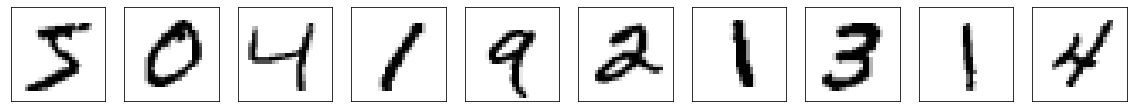

In [4]:
def plot(x,p,labels=False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28),cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argnax(p[i]))
    plt.show()

plot(x_train,None)

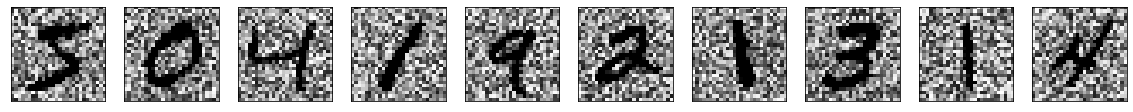

In [5]:
plot(x_train_noisy,None)

**Building and Training a Classifier**

In [8]:
classifier=Sequential([
    Dense(256,activation='relu',input_shape=(784,)),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')                      
])

classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
classifier.fit(x_train, y_train, batch_size=512, epochs=30)

Epoch 1/30
118/118 [==============================] - 2s 15ms/step - loss: 0.4206 - accuracy: 0.8869
Epoch 2/30
118/118 [==============================] - 2s 15ms/step - loss: 0.1527 - accuracy: 0.9557
Epoch 3/30
118/118 [==============================] - 2s 15ms/step - loss: 0.1016 - accuracy: 0.9703
Epoch 4/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0764 - accuracy: 0.9776
Epoch 5/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0588 - accuracy: 0.9826
Epoch 6/30
118/118 [==============================] - 2s 16ms/step - loss: 0.0458 - accuracy: 0.9866
Epoch 7/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0360 - accuracy: 0.9893
Epoch 8/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0302 - accuracy: 0.9913
Epoch 9/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0233 - accuracy: 0.9932
Epoch 10/30
118/118 [==============================] - 2s 15ms/step - loss: 0.0183 - accura

In [9]:
loss,acc=classifier.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9818
0.08172160387039185
0.9818000197410583


In [10]:
loss,acc=classifier.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9818
0.08172160387039185
0.9818000197410583


**Building the Auto-encoder**

In [11]:
input_image=Input(shape=(784,))
encoded=Dense(64,activation='relu')(input_image)
decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_image,decoded)
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

**Training the Auto-encoder**

In [12]:
autoencoder.fit(
    x_train_noisy,x_train,epochs=100,
    batch_size=512,validation_split=0.2,verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss',patience=5),
        LambdaCallback(on_epoch_end=lambda e,l:print('{:.3f}'.format(l['val_loss']),end='_'))
    ]
)

print('_')
print('Training is complete!')

0.262_0.240_0.203_0.183_0.172_0.163_0.155_0.149_0.144_0.139_0.135_0.132_0.129_0.126_0.124_0.122_0.121_0.119_0.118_0.117_0.116_0.115_0.114_0.113_0.112_0.112_0.111_0.111_0.111_0.110_0.110_0.110_0.110_0.109_0.109_0.109_0.109_0.109_0.109_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.108_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107_0.107__
Training is complete!


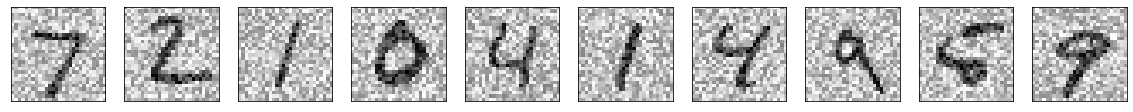

In [13]:
predictions=autoencoder.predict(x_test_noisy)
plot(x_test_noisy,None)

**De-noised Images**

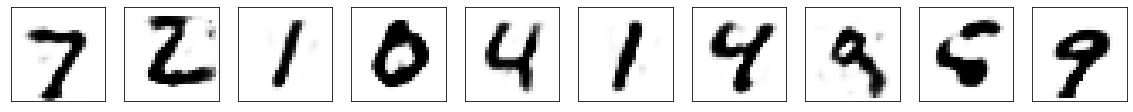

In [14]:
plot(predictions,None)

In [15]:
loss,acc=classifier.evaluate(predictions,y_test)
print(acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9645
0.9645000100135803
